In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

/usr/local/python3/miniconda/lib/python3.4/site-packages/matplotlib-1.5.0rc1+61.g461da6c-py3.4-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from iuvs import io

/usr/local/python3/miniconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
fname = '/maven_iuvs/production/products/level1b/mvn_iuv_l1b_apoapse-orbit00335-muv_20141201T023133_v02_r01.fits.gz'
l1b = io.L1BReader(fname)

In [59]:
from iuvs.apoapse import *

In [5]:
apo = Apoapse(fname, 291)

The `selector` is a dataframe of booleans that check for each integration which spatial pixels are on the Martian disk, meaning their 'over-limb altitude' is larger 0:

In [6]:
selector = apo.p_alts.apply(lambda x: all(~(x > 0)), axis=2)

For the latitudes and longitude I only take the center coordinates for now, ignoring the corner coords of the pixel. The center value is in the 4th column of the last axis of the 3D array:

In [7]:
center_lats = apo.p_lats.loc[:,:,4]
center_lons = apo.p_lons.loc[:,:, 4]

In [36]:
lons = center_lons[selector].values.ravel()
lats = center_lats[selector].values.ravel()

In [49]:
apo.spec.shape

(39, 10, 30)

In [53]:
data = apo.spec[:,:,22][selector].values.ravel()

In [18]:
sns.set_context('talk')

In [12]:
%matplotlib nbagg

In [102]:
df = process_fnames(io.l1b_filenames('apoapse*-muv_20150209T'), 290)

/maven_iuvs/stage/products/level1b
mvn_iuv_l1b_apoapse-orbit00703-muv_20150209T080400_v01_s01.fits.gz
mvn_iuv_l1b_apoapse-orbit00702-muv_20150209T032348_v01_s01.fits.gz
mvn_iuv_l1b_apoapse-orbit00705-muv_20150209T164655_v02_s02.fits.gz
mvn_iuv_l1b_apoapse-orbit00703-muv_20150209T075318_v02_s02.fits.gz
mvn_iuv_l1b_apoapse-orbit00706-muv_20150209T211624_v01_s01.fits.gz
mvn_iuv_l1b_apoapse-orbit00705-muv_20150209T175628_v01_s01.fits.gz
mvn_iuv_l1b_apoapse-orbit00704-muv_20150209T121726_v02_s02.fits.gz
mvn_iuv_l1b_apoapse-orbit00703-muv_20150209T074756_v02_s02.fits.gz
mvn_iuv_l1b_apoapse-orbit00705-muv_20150209T164135_v02_s02.fits.gz
mvn_iuv_l1b_apoapse-orbit00705-muv_20150209T174546_v02_s02.fits.gz
mvn_iuv_l1b_apoapse-orbit00704-muv_20150209T130014_v01_s01.fits.gz
mvn_iuv_l1b_apoapse-orbit00702-muv_20150209T030225_v01_s01.fits.gz
mvn_iuv_l1b_apoapse-orbit00705-muv_20150209T172422_v01_s01.fits.gz
mvn_iuv_l1b_apoapse-orbit00706-muv_20150209T223638_v02_s02.fits.gz
mvn_iuv_l1b_apoapse-orbit00

In [103]:
df.to_hdf('/home/klay6683/to_keep/apoapse/muv_20150209.h5','df')

<IPython.core.display.Javascript object>


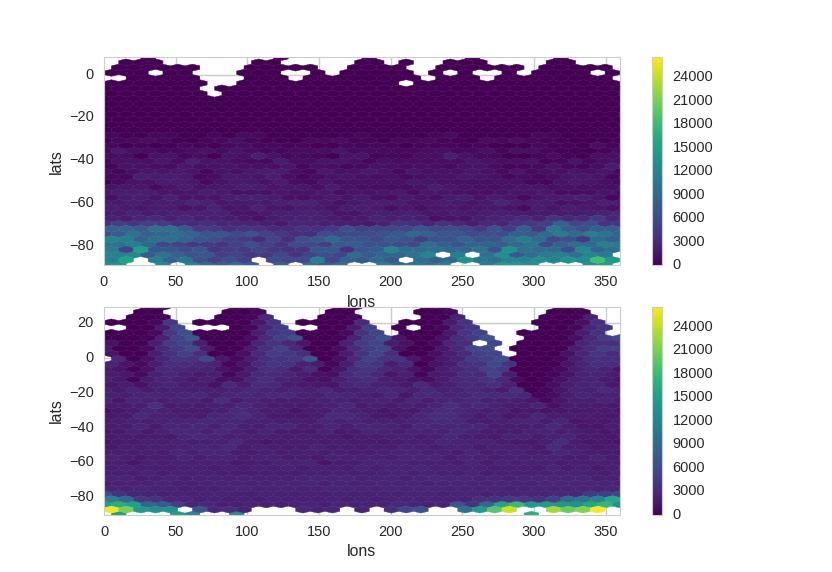

In [116]:
df2 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20150209.h5')
df1 = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141117.h5')
fig, ax = plt.subplots(nrows=2)
vmax = df2.data.max()
df1.plot(kind='hexbin', x='lons', y='lats', C='data', mincnt=1, gridsize=35,
           cmap='viridis', vmax=vmax, ax=ax[0])
df2.plot(kind='hexbin', x='lons', y='lats', C='data', mincnt=1, gridsize=35,
         cmap='viridis', vmax=vmax, ax=ax[1])

<IPython.core.display.Javascript object>


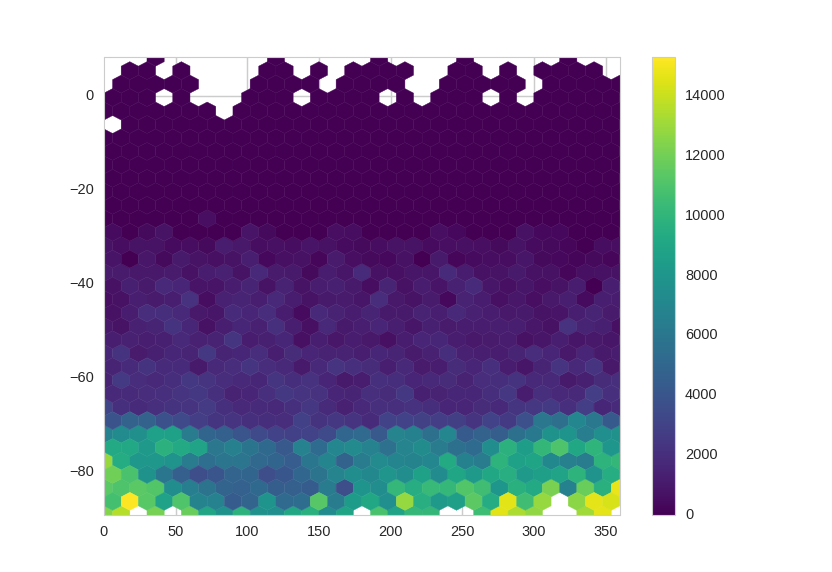

In [106]:
df = pd.read_hdf('/home/klay6683/to_keep/apoapse/muv_20141117.h5')
plt.figure()
plt.hexbin(df.lons, df.lats, df.data, mincnt=1, gridsize=30,
           cmap='viridis')
plt.colorbar()

In [107]:
plt.hexbin?

In [ ]:
lats, lons, data = process_fnames(io.l1b_filenames('apoapse*-muv_2015021*T',
                                                   env='production'))

fig, axes = plt.subplots(nrows=2, sharex=True)
gridsize = 35
mincnt = 1
extent = [0, 360, -90, 50]
im0 = axes[0].hexbin(lons, lats, C=data, gridsize=gridsize, mincnt=mincnt, cmap='viridis',
           extent=extent)
plt.colorbar(im0, ax=axes[0])
axes[0].set_title('Dates: 2015021*T , Mean L1B.HDU[0] values')
im1 = axes[1].hexbin(lons, lats, gridsize=gridsize, mincnt=mincnt, cmap='viridis',
           extent=extent)
axes[1].set_title('N entries in bin')
plt.colorbar(im1, ax=axes[1])
axes[1].set_xlabel('Longitude')
for ax in axes:
    ax.set_ylabel('Latitude')
fig.tight_layout()

In [ ]:
# lats, lons, data = process_fnames(io.l1b_filenames('apoapse*-muv_2014111*T',
#                                                    env='production'))
fig, axes = plt.subplots(nrows=2, sharex=True)

gridsize = 35
mincnt = 1
extent = [0, 360, -90, 50]
im0 = axes[0].hexbin(lons, lats, C=data, gridsize=gridsize, mincnt=mincnt, cmap='viridis',
           extent=extent)
plt.colorbar(im0, ax=axes[0])
axes[0].set_title('Dates: 2014111*T , Mean L1B.HDU[0] values')
im1 = axes[1].hexbin(lons, lats, gridsize=gridsize, mincnt=mincnt, cmap='viridis',
           extent=extent)
axes[1].set_title('N entries in bin')
plt.colorbar(im1, ax=axes[1])
axes[1].set_xlabel('Longitude')
for ax in axes:
    ax.set_ylabel('Latitude')
fig.tight_layout()